<div align="center">

# IHE Delft

## Transient Groundwater Flow Course

## Chapter 5: 1D flow

prof. dr.ir. T.N.Olsthoorn

tolsthoorn@gmail.com

Feb. 2025

</div>

# Waves in groundwater

Given that the surface water at the face of the aquifer at $x=0$ fluctuations according to a $\sin(\omega t)$. Then given the amplitude of $A$, the head at any point in the aquifer varies according to

$$ s(x, t) = A e^{-ax} \sin(\omega t - a x), \,\,\mathtt{where}\,\,a = \sqrt{\frac{\omega S}{2 kD}}$$

We will show this solution below as a function of $x$ for a few times.

In [1]:
# First import the modules with the functionality that we need:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

Let's now show a few groundwater head waves in the aquifer and also show the envelopes between which the head varies. The envelopes are $\pm A e ^{-a}$

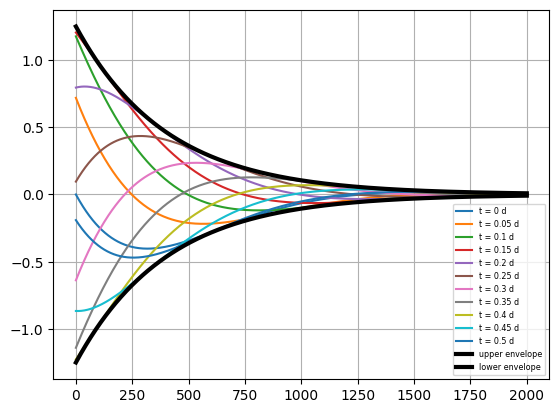

In [2]:
A = 1.25 # amplitude at x=0 [m]
omega = 2 * np.pi / (12.3 / 24) # angular velocity [radians / day]
S = .001 # specific yield or elastic storage coefficient [-]
kD = 1000. # transmissivity [m2/d]
a = np.sqrt(omega * S / (2 * kD)) # damping [1/m] 

x= np.linspace(0, 2000, 1001) # points at which we compute the head [m]
t =0.1

for t in np.linspace(0, 0.5, 11):
    s = A * np.exp(-a * x) * np.sin(omega * t - a * x)
    plt.plot(x, s, label=f"t = {t:.3g} d")
    
env = A * np.exp(-a * x)
plt.plot(x, +env, 'k', lw=3, label='upper envelope')
plt.plot(x, -env, 'k', lw=3, label='lower envelope')
plt.grid()
plt.legend(loc='lower right', fontsize='xx-small')

Let's now superimpose a number of waves each with its own amplitude, frequency and initial value. This superposition can be written out mathematically as

$$s(x,t) = \sum_{i=0}^N \left( A_i e^{-a_i x} \sin(\omega_i - a_i x + \theta_i) \right)$$

First determine the values to use for the parameters

In [3]:
As = np.array([1.0, 1.5, 0.7, 0.3])
omegas = 2 * np.pi / np.array([0.1, 0.3, 0.5, 0.7])
thetas = 2 * np.pi * np.array([0.0, 0.1, 0.5, 0.7])
a_s = np.sqrt(omegas * S / (2 * kD))

print("As = ", As)
print("omegas = ", omegas)
print("thetas = ", thetas)
print("a_s = ", a_s)

As =  [1.  1.5 0.7 0.3]
omegas =  [62.83185307 20.94395102 12.56637061  8.97597901]
thetas =  [0.         0.62831853 3.14159265 4.39822972]
a_s =  [0.00560499 0.00323604 0.00250663 0.00211849]


Then apply them and do the superposition of these waves. And show them for a number of times for all $x$-values.

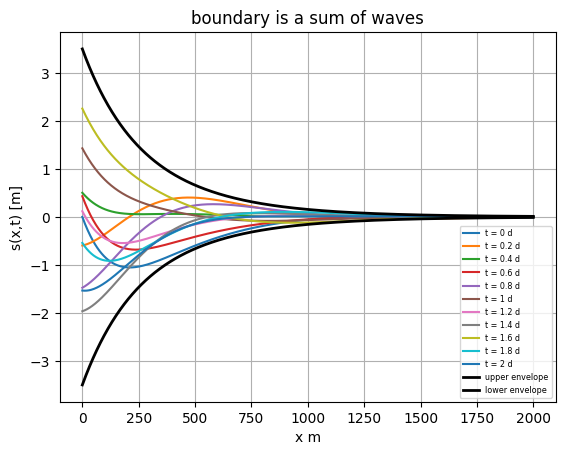

In [ ]:
for t in np.linspace(0, 2, 11):
    s   = np.zeros_like(x)
    env = np.zeros_like(x)
    for A, omega, a, theta in zip(As, omegas, a_s, thetas):
        s += A * np.exp(-a * x) * np.sin(omega * t - a * x)
        env += A * np.exp(-a * x)
    
    plt.plot(x, s, label=f"t = {t:.3g} d")

plt.plot(x, +env, 'black', lw=2, label="upper envelope")
plt.plot(x, -env, 'black', lw=2, label="lower envelope")
plt.grid()
plt.title("boundary is a sum of waves")
plt.xlabel('x m')
plt.ylabel('s(x,t) [m]')
    
plt.legend(loc="lower right", fontsize='xx-small')

We can also show the for all times and a few $x$-values, which is what we would actually measure in piezometers. The exercise is left to the student.

## Half inifnite aquifer with sudden change of head at $x=0$.

The formula to compute this is

$$ s(x, t) = A \mathtt{erfc}(u), \,\,\mathtt{with}\,\,\,u=\sqrt{\frac{x^2 S}{4 kD t}}$$

or

$$ s(x, t) = A \, \mathtt{erfc}  \left\{ x \sqrt{\frac{S}{4 kD t}} \right\}$$

Let's first show the function $\mathtt{erfc}(u)$ versus $u\sim x$  and versus $1/u
 \sim \sqrt(t)$

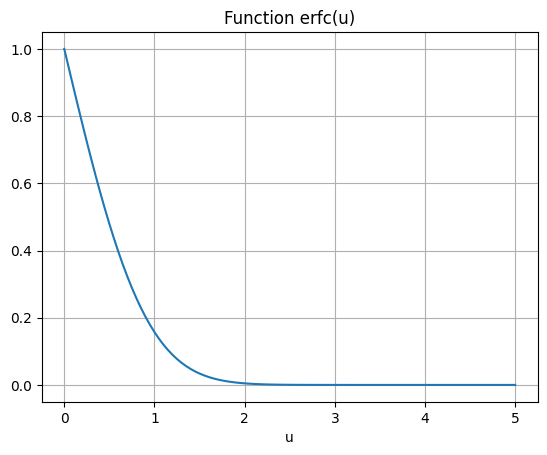

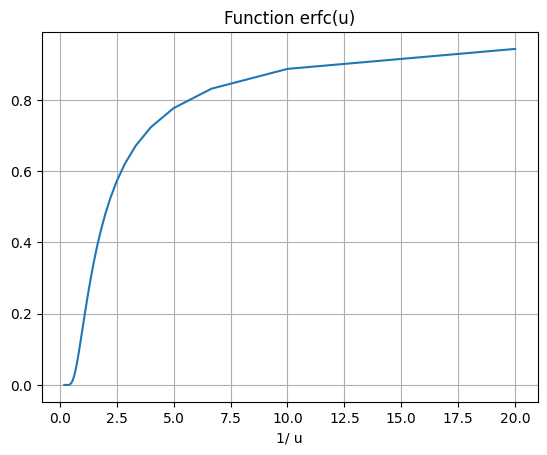

In [ ]:
u = np.linspace(0, 5, 101)

plt.title("Function erfc(u)")
plt.xlabel("u")
plt.grid()
plt.plot(u, erfc(u))
plt.show()

plt.title("Function erfc(u)")
plt.xlabel("1/ u")
plt.grid()
plt.plot(1 / u[1:], erfc(u[1:]))
plt.show()

Next we show the development of the head over time by showing the graph as a function of $x$ instead of $u$ for a number of times.

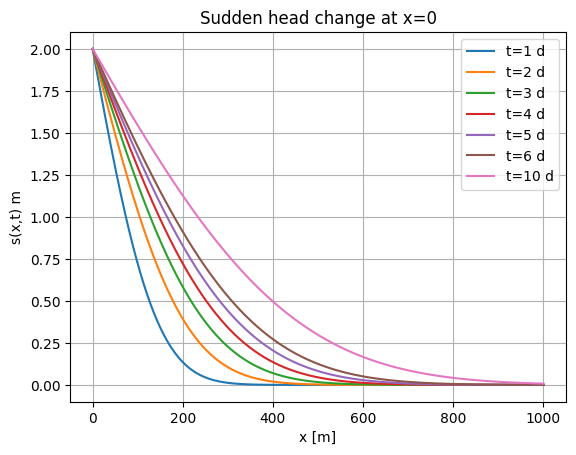

In [ ]:
A = 2 # amplitude in m
S = 0.1 # []
kD = 600 # m2/d

x = np.linspace(0, 1000, 1001)
times = [1, 2, 3, 4, 5, 6, 10]

for t in times:
    s = A * erfc(x * np.sqrt(S / (4 * kD * t)))
    plt.plot(x, s, label=f"t={t} d")
plt.title("Sudden head change at x=0")
plt.xlabel("x [m]")
plt.ylabel("s(x,t) m")
plt.grid(True)
plt.legend()

Next, we show the development of the head as a function time for a number of $x$-values, which is what we expect to measure in piezometers.

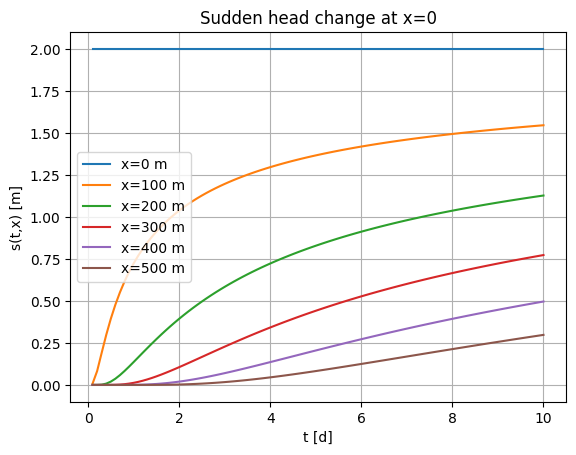

In [ ]:
A = 2  # amplitude in m
S = 0.1  # []
kD = 600  # m^2/d

t = np.linspace(0.1, 10, 100)  # Avoid t=0 to prevent division by zero
x_values = [0, 100, 200, 300, 400, 500]  # Selected x values

for x in x_values:
    s = A * erfc(x * np.sqrt(S / (4 * kD * t)))
    plt.plot(t, s, label=f"x={x} m")

plt.title("Sudden head change at x=0")
plt.xlabel("t [d]")
plt.ylabel("s(t,x) [m]")
plt.grid(True)
plt.legend()
plt.show()


Finally we use the function to carry out superposition. The example blow shows the effect on the groundwater of a lake of which the level increases over time.

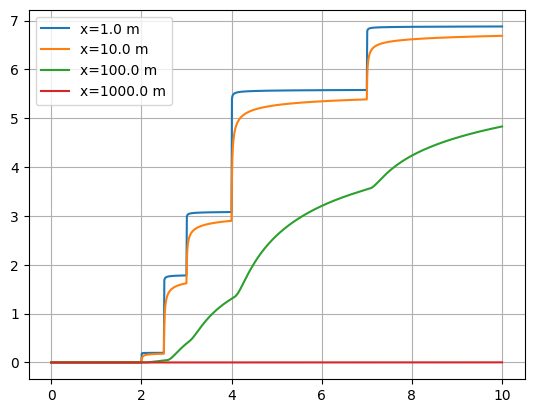

In [ ]:
S, kD = 0.1, 600

h = np.array([1, 1.2, 2.8, 4.1, 6.6, 7.9]) # water elevation at x=0 [m]
times= [1, 2, 2.5, 3, 4, 7]      # list of measurement times

dh = np.diff(h)

t = np.linspace(0, 10, 1001)
xs = [1., 10., 100., 1000.]


for x in xs:
    s = np.zeros_like(t)
    for ti, dhi in zip(times[1:], dh):
        # print(x, ti, dhi)
        s[t > ti] += dhi * erfc(x * np.sqrt(S / (4 * kD * (t[t > ti] - ti))))
    
    plt.plot(t, s, label=f"x={x} m")
plt.grid()
plt.legend()
plt.show()


-----